600
torch.Size([100, 1, 28, 28]) torch.Size([100])


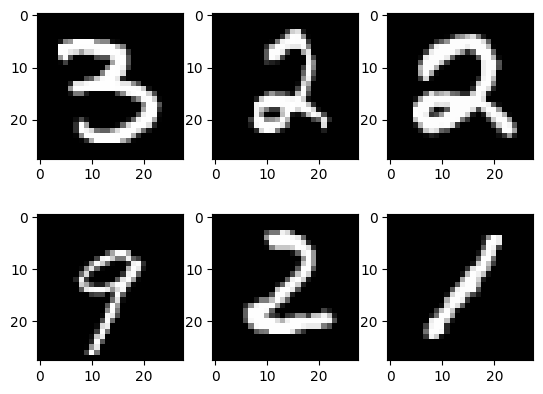

In [14]:
#MNIST
#DataLoader, trnsformation
#Multilayer neural network and activtion fuctions
# loss and optimizer
# training loop (batch training)
#Model evaluation
#gpu support

import torch
import torch.nn as nn
import torchvision # for the dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyperparameters
input_size = 784  #bcz we see later that our image is size 28 x 28. and we will flatten this array to be a 1d tensor
hidden_size = 100 
num_classes = 10 #bcz we have digits from 0 to 9
num_epochs = 2
batch_size =100
learning_rate = 0.001

#import MNIST data
train_data = torchvision.datasets.MNIST(root='./data',train=True, transform = transforms.ToTensor(), download= True)
test_data = torchvision.datasets.MNIST(root='./data',train=False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_data,batch_size= batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_data,batch_size= batch_size,shuffle=False)

example = iter(train_loader)
samples,labels = next(example)
print(samples.shape,labels.shape)

#plotting in pyplot
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')
#plt.show()


epoch = 1/ 2, step = 100/600, loss = 0.3922
epoch = 1/ 2, step = 200/600, loss = 0.2947
epoch = 1/ 2, step = 300/600, loss = 0.2870
epoch = 1/ 2, step = 400/600, loss = 0.3578
epoch = 1/ 2, step = 500/600, loss = 0.2071
epoch = 1/ 2, step = 600/600, loss = 0.1751
epoch = 2/ 2, step = 100/600, loss = 0.0950
epoch = 2/ 2, step = 200/600, loss = 0.2622
epoch = 2/ 2, step = 300/600, loss = 0.2258
epoch = 2/ 2, step = 400/600, loss = 0.1142
epoch = 2/ 2, step = 500/600, loss = 0.1442
epoch = 2/ 2, step = 600/600, loss = 0.1474
accuracy = 95.39


TypeError: ignored

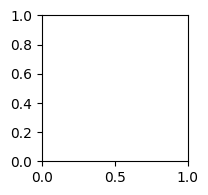

In [21]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1= nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    #no softmax here bcz crossentropy will use thaat for us. 
    return out

model = NeuralNet(input_size,hidden_size,num_classes)

#loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

#training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):  #enumerate will give us the index and thge data
    #reshape our images first shape=(100 x 1 x 28 x 28), inputsize-== 784, so our image tensor need 100,784

    images = images.reshape(-1,28*28).to(device)   #--- todevice will push it to device if gpu support is there
    labels = labels.to(device)

    #forward prop
    outputs = model(images)
    loss = criterion(outputs,labels)

    #backwardprop
    #first we need to empty the vaalues in gradient attribute
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()  #---> update step by updating the weights


    if(i+1)%100==0:
      print(f'epoch = {epoch+1}/ {num_epochs}, step = {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

#testing and evaluation
#for this we dont want to compute the gradients for all the steps we do, 

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  accuracy=1
  for images,labels in test_loader:
    images = images.reshape(-1,28*28).to(device)   #--- todevice will push it to device if gpu support is there
    labels = labels.to(device)
    outputs = model(images)

    #max will return value and index. we are interested in the index
    _,predictions = torch.max(outputs,1)
    n_samples = labels.shape[0]
    n_correct += (predictions==labels).sum().item()
  accuracy =  n_correct / n_samples
  print(f'accuracy = {accuracy}')
  

    


  